# Categorical deduction (generic + instances, all inferences, mutually exclusive + collectively exhaustive)
0. universal statement format (relationship, from, to, probability) tuples, dictionary for source/citation and which statement inferred from. 
1. Take one statement at a time, including mutually exclusive and collectively exhaustive (all sets disjoint from each other). build statement queue. 
2. Create powerset of combinations of specific statements (should come to reduced set of specific statements based on originals)
3. create a inference graph for each combination of specific statements.
4. Make all possible inferences for each graph (chain)
5. present the union of possible conclusions for each node

In [1]:
# Syllogism specific statements 
# First statement A __ B. 
# Second statement B __ C.
# Third statement A ___ C -> look up tables to check if true, possible, or false.

specific_statement_options = {'disjoint from','overlaps with','subset of','superset of','identical to'}

# make a dictionary. key is a tuple with first statement type, second statement type and third statement type and value is True, Possible, False
Truth_Table = dict()
Truth_Table[( 'subset of', 'subset of', 'subset of')] = 'True'
Truth_Table[( 'identical to', 'subset of', 'subset of')] = 'True'
Truth_Table[( 'overlaps with', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'subset of')] = 'True'
Truth_Table[( 'identical to', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'disjoint from', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'superset of', 'subset of')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'subset of', 'identical to')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'identical to')] = 'True'
Truth_Table[( 'overlaps with', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'identical to')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'disjoint from', 'identical to')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'superset of', 'identical to')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'overlaps with')] = 'True'
Truth_Table[( 'disjoint from', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'overlaps with')] = 'True'
Truth_Table[( 'overlaps with', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'disjoint from', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'disjoint from', 'subset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'disjoint from')] = 'True'
Truth_Table[( 'superset of', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'disjoint from')] = 'True'
Truth_Table[( 'identical to', 'disjoint from', 'disjoint from')] = 'True'
Truth_Table[( 'overlaps with', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'disjoint from')] = 'True'
Truth_Table[( 'superset of', 'superset of', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'subset of', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'superset of')] = 'True'
Truth_Table[( 'subset of', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'overlaps with', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'disjoint from', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'superset of')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'superset of')] = 'True'
Truth_Table[( 'overlaps with', 'superset of', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'superset of')] = 'True'

# instances
Truth_Table[('element of', 'subset of', 'element of')]='True'
Truth_Table[('element of', 'subset of', 'not element of')]='False'
Truth_Table[('not element of', 'subset of', 'element of')]='Possible'
Truth_Table[('not element of', 'subset of', 'not element of')]='Possible'
Truth_Table[('element of', 'identical to', 'element of')]='True'
Truth_Table[('element of', 'identical to', 'not element of')]='False'
Truth_Table[('not element of', 'identical to', 'element of')]='False'
Truth_Table[('not element of', 'identical to', 'not element of')]='True'
Truth_Table[('element of', 'overlaps with', 'element of')]='Possible'
Truth_Table[('element of', 'overlaps with', 'not element of')]='Possible'
Truth_Table[('not element of', 'overlaps with', 'element of')]='Possible'
Truth_Table[('not element of', 'overlaps with', 'not element of')]='Possible'
Truth_Table[('element of', 'disjoint from', 'element of')]='False'
Truth_Table[('element of', 'disjoint from', 'not element of')]='True'
Truth_Table[('not element of', 'disjoint from', 'element of')]='Possible'
Truth_Table[('not element of', 'disjoint from', 'not element of')]='Possible'
Truth_Table[('element of', 'superset of', 'element of')]='Possible'
Truth_Table[('element of', 'superset of', 'not element of')]='Possible'
Truth_Table[('not element of', 'superset of', 'element of')]='False'
Truth_Table[('not element of', 'superset of', 'not element of')]='True'



In [2]:
major_premise = 'subset of'
minor_premise = 'subset of'
conclusion = 'subset of'
truth_value = Truth_Table[(major_premise,minor_premise,conclusion)]
print(truth_value)

def truth_value_additive(major_premise,minor_premise,conclusion):
    return Truth_Table[(major_premise,minor_premise,conclusion)]

def all_true_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='True']

def all_possible_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='Possible']

def all_false_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='False']


True


In [3]:
truth_value_additive('subset of','superset of','overlaps with')

'Possible'

In [4]:
all_true_specific('subset of','overlaps with')

[]

In [5]:
reverse_implications = dict()
reverse_implications['subset of']='superset of'
reverse_implications['identical to']='identical to'
reverse_implications['overlaps with']='overlaps with'
reverse_implications['disjoint from']='disjoint from'
reverse_implications['superset of']='subset of'

# instances
reverse_implications['element of'] = 'containing'
reverse_implications['not element of'] = 'not containing'
reverse_implications['containing'] = 'element of'
reverse_implications['not containing'] = 'not element of'


In [6]:
generic_statement_options = {'All','Some','No','Some_not'} # universal affirmative, particular affirmative, universal negative, particular negative
generic_to_specific = dict()
generic_to_specific['All'] = {'subset of','identical to'}  
generic_to_specific['No'] = {'disjoint from'}
generic_to_specific['Some'] = {'overlaps with','subset of','identical to','superset of'} # generic_to_specific['All'].union({'superset of','overlaps with'})
generic_to_specific['Some_not'] = {'overlaps with','disjoint from','superset of'} # generic_to_specific['No'].union({'superset of','overlaps with'})


In [ ]:
# Mutually exclusive:
def mutually_exclusive(listofsets):
    return [[x,'disjoint from',y] for x in listofsets for y in listofsets if x!=y]

In [6]:
mutually_exclusive(['A','B']) .   

[['A', 'disjoint from', 'B'], ['B', 'disjoint from', 'A']]

In [ ]:
def collectively_exhaustive(listofsubsets,superset):
    # all of these subsets are subsets of superset. 
    # the union of all these subsets is the superset.
    # i.e if x is an instance in superset, and x is not an instance of a certain number of these subsets, it is an instance
    # of at least one of the others.
    # MECE: if x is an instance in superset, and x is an instance of a set, then x is NOT an instance of any of the others
    # MECE: if x is an instance in superset, and x is not an instance of a set, then x is an instance of exactly one of the
    # remaining subsets.
    
    
    

In [7]:
# generic premises and conclusion: tautology, fallacy, or possible if
# take in generic premises, make powersets of major and minor premise possibilities,
# get the truth value for each, and get the joint conclusion: 
# always true (tautology), sometimes true or possible, and always false
import itertools

generic_major_premise = 'All'
generic_minor_premise = 'No'
generic_conclusion = 'No'

possibilities = list(itertools.product(generic_to_specific[generic_major_premise],generic_to_specific[generic_minor_premise],generic_to_specific[generic_conclusion]))

truth_value_list = []
for p in possibilities:
    truth_value_list.append(truth_value_additive(p[0],p[1],p[2]))
print(possibilities,truth_value_list)

[('identical to', 'disjoint from', 'disjoint from'), ('subset of', 'disjoint from', 'disjoint from')] ['True', 'True']


In [8]:
def generic_truth_value_additive(generic_major_premise,generic_minor_premise,generic_conclusion):
    possibilities = list(itertools.product(generic_to_specific[generic_major_premise],generic_to_specific[generic_minor_premise],generic_to_specific[generic_conclusion]))
    truth_value_list = []
    for p in possibilities:
        truth_value_list.append(truth_value_additive(p[0],p[1],p[2]))
    print(possibilities,truth_value_list)
    if ('True' in truth_value_list) and ('False' not in truth_value_list) and ('Possible' not in truth_value_list):
        return 'True'
    elif ('False' in truth_value_list) and ('True' in truth_value_list):
        return 'Possible'
    elif ('Possible' in truth_value_list):
        return 'Possible'
    elif ('False' in truth_value_list) and ('Possible' not in truth_value_list) and ('True' not in truth_value_list):
        return 'False'
    else:
        return 'Not valid truth values'
  

In [9]:
generic_truth_value_additive('Some','No','No')

[('identical to', 'disjoint from', 'disjoint from'), ('subset of', 'disjoint from', 'disjoint from'), ('overlaps with', 'disjoint from', 'disjoint from'), ('superset of', 'disjoint from', 'disjoint from')] ['True', 'True', 'Possible', 'Possible']


'Possible'

In [10]:
# reverse implications, additive only (A,B) - (B,C) - (A,C)
# define sets
sets = ['A','B','C']

first_statement = ['B','subset of','A']
second_statement = ['C','overlaps with','B']
third_statement = ['C','disjoint from','A']

additive_set_order_check = dict()
additive_set_order_check['first'] = (0,1)
additive_set_order_check['second'] = (1,2)
additive_set_order_check['third'] = (0,2)
# check if a statement needs to be reversed
def check_reverse_specific(statement,stype,sets):
        if (statement[0]==sets[additive_set_order_check[stype][0]]) and (statement[2]==sets[additive_set_order_check[stype][1]]):
            print('straight')
            return statement
        else:
            print('reverse')
            return [statement[2],reverse_implications[statement[1]],statement[0]]
            
# Ideally, should auto calculate order or sets. or alternatively, calculate the reverse of each statement as an inference.




In [11]:
# Given a set of statements in the form ['A', 'disjoint from','B'], make all inferences, find all contradictions. 
import networkx as nx
del(infG)
statement_set = [['A','subset of','B'],['B','subset of','C'],['D','identical to','C']]
# make a graph? 
infG = nx.DiGraph()
# get list of nodes from elt 0 and 2 from each statement
setnodes = set()
fromnodes = set()
tonodes = set()
for statement in statement_set:
    fromnodes.add(statement[0])
    tonodes.add(statement[2])
    infG.add_edge(statement[0],statement[2],rel = statement[1])
setnodes = fromnodes.union(tonodes)
print(fromnodes,tonodes, setnodes)
roots = fromnodes-tonodes
ends = tonodes - fromnodes
print(roots,ends)

NameError: name 'infG' is not defined

In [ ]:
import matplotlib.pyplot as plt
#nx.draw_spectral(infG,with_labels=True,edge_labels = 'rel' font_size=18,node_size=1200)

In [ ]:
pos = nx.spectral_layout(infG)
nx.draw(infG, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(infG,'rel')
nx.draw_networkx_edge_labels(infG, pos, labels = edge_labels)
#plt.savefig('this.png')
plt.show()
#nx.get_edge_attributes(infG,'rel')

In [ ]:
# getting reverse implications and redrawing graph
infGr = nx.DiGraph()
for statement in statement_set:
    infGr.add_edge(statement[2],statement[0],rel = reverse_implications[statement[1]])
pos = nx.spectral_layout(infGr)
nx.draw(infGr, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(infGr,'rel')
nx.draw_networkx_edge_labels(infGr, pos, labels = edge_labels)
#plt.savefig('this.png')
plt.show()

# note this rewrites the latest edges, and doesn't show multiple edges between nodes, which is annoying. 

In [ ]:
def make_all_inferences(infGc):
    roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
    ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
    
    infG1 = infGc.copy()
    
    prev_paths = ['']
    no_more_inf_flag = 0
    contradiction_found = 0
    while no_more_inf_flag==0:
        # calculating paths between roots and ends
        paths = dict()
        num_infs= 0
        for r in roots:
            paths[r] = dict()
            for e in ends:
                paths[r][e] = list(nx.all_simple_paths(infG1,r,e))

        paths[r][e]= [p for p in paths[r][e] if p not in prev_paths]
        prev_paths = prev_paths + paths[r][e]
        
        
        
        for r in roots:
            for e in ends:
                for p in paths[r][e]:
                    print(p)
                    for i in range(len(p)-2):
                        print(p[i],p[i+1],p[i+2])
                        inf = all_true_specific(infG1.edges[(p[i],p[i+1])]['rel'],infG1.edges[(p[i+1],p[i+2])]['rel'])
                        if len(inf)>0:
                            # catch contradictions
                            if (p[i],p[i+2]) in infG1.edges():
                                if infG1.edges[(p[i],p[i+2])]['rel'] not in inf:
                                    print('Contradicting relationship between ',p[i],' and ',p[i+2],' already exists as ',infG1.edges[(p[i],p[i+2])]['rel'])
                                    contradiction_found = 1
                            else:
                                print('Since ',p[i],infG1.edges[(p[i],p[i+1])]['rel'],p[i+1],', and ',p[i+1],infG1.edges[(p[i+1],p[i+2])]['rel'],p[i+2],', this means')
                                print(p[i],inf[0],p[i+2])
                                infG1.add_edge(p[i],p[i+2],rel=inf[0])
                                fromnodes.add(p[i])
                                tonodes.add(p[i+2])
                                num_infs= num_infs+1
        if (num_infs==0) or (contradiction_found==1):
            no_more_inf_flag = 1

    if contradiction_found==1:
        print('not updating graph since contradiction found')
        del(infG1)
    else: 
        infGc = infG1.copy()
        del(infG1)

    edges = list(infGc.edges())
    for edge in edges:
        print(edge,infGc.edges[edge]['rel'])
    return (infGc,contradiction_found)

In [ ]:
(infG,cd_found) = make_all_inferences(infG)
if cd_found==1:
    print('not changing graph until contradiction resolved')
else:
    print('Updated graph')

In [ ]:
del(infG2)

In [ ]:
infG2 = nx.MultiDiGraph()
for (u,v) in infG.edges():
    infG2.add_edge(u,v,0,rel=infG.edges[(u,v)]['rel'])
    infG2.add_edge(v,u,1,rel=reverse_implications[infG.edges[(u,v)]['rel']])

In [ ]:
list(nx.all_simple_paths(infG2,'D','A'))

In [14]:
def get_s_or_r_multi(infG3,u,v):
    if infG3.edges.get((u,v,0),'')=='':
        return 1
    else:
        return 0

def get_rel_multidigraph(infG3,u,v):
    return infG3.edges[(u,v,get_s_or_r_multi(infG3,u,v))]['rel']
    

In [ ]:
roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
print(roots,ends)

prev_paths = ['']
paths = dict()
for r in roots:
    paths[r] = dict()
    for e in ends:
        paths[r][e] = list(nx.all_simple_paths(infG2,r,e))
print(paths)

In [ ]:
all_true_specific(get_rel_multidigraph(infG2,'D','C'),get_rel_multidigraph(infG2,'C','B'))

In [13]:
def make_all_inferences_multi(infGc):
    # make multidigraph
    infG2 = nx.MultiDiGraph()
    roots = list(infG.nodes())
    ends = list(infG.nodes())
    if str(type(infGc))=="<class 'networkx.classes.multidigraph.MultiDiGraph'>": 
        for (u,v) in infGc.edges():
            if get_s_or_r_multi(infGc,u,v)==0:
                infG2.add_edge(u,v,0,rel=get_rel_multidigraph(infGc,u,v))
                infG2.add_edge(v,u,1,rel=reverse_implications[get_rel_multidigraph(infGc,u,v)])
            else:
                infG2.add_edge(u,v,1,rel=get_rel_multidigraph(infGc,u,v))
                infG2.add_edge(v,u,0,rel=reverse_implications[get_rel_multidigraph(infGc,u,v)])
    elif str(type(infGc))=="<class 'networkx.classes.digraph.DiGraph'>":
        #roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
        #ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
        
        for (u,v) in infGc.edges():
            infG2.add_edge(u,v,0,rel=infGc.edges[(u,v)]['rel'])
            infG2.add_edge(v,u,1,rel=reverse_implications[infGc.edges[(u,v)]['rel']])
    else:
        print('Only directed graphs or multidirected graphs accepted')
        return ('','')

    prev_paths = []
    no_more_inf_flag = 0
    contradiction_found = 0
    while no_more_inf_flag==0:
        # calculating paths between roots and ends
        paths = dict()
        num_infs= 0
        for r in roots:
            paths[r] = dict()
            for e in ends:
                paths[r][e] = list(nx.all_simple_paths(infG2,r,e))

        paths[r][e]= [p for p in paths[r][e] if p not in prev_paths]
        prev_paths = prev_paths + paths[r][e]
        #print(prev_paths)
        
        
        for r in roots:
            for e in ends:
                for p in paths[r][e]:
                    #print(p)
                    for i in range(len(p)-2):
                        #print(p[i],p[i+1],p[i+2])
                        #print(get_rel_multidigraph(infG2,p[i],p[i+1]))
                        #print(get_rel_multidigraph(infG2,p[i+1],p[i+2]))
                        inf = all_true_specific(get_rel_multidigraph(infG2,p[i],p[i+1]),get_rel_multidigraph(infG2,p[i+1],p[i+2]))
                        if len(inf)>0:
                            # catch contradictions
                            if (p[i],p[i+2]) in infG2.edges():
                                if get_rel_multidigraph(infG2,p[i],p[i+2]) not in inf:
                                    print('Contradicting relationship between ',p[i],' and ',p[i+2],' already exists as ',get_rel_multidigraph(infG2,p[i],p[i+2]))
                                    contradiction_found = 1
                            else:
                                print('Since ',p[i],get_rel_multidigraph(infG2,p[i],p[i+1]),p[i+1],', and ',p[i+1],get_rel_multidigraph(infG2,p[i+1],p[i+2]),p[i+2],', this means')
                                print(p[i],inf[0],p[i+2])
                                infG2.add_edge(p[i],p[i+2],0,rel=inf[0])
                                fromnodes.add(p[i])
                                tonodes.add(p[i+2])
                                num_infs= num_infs+1
        if (num_infs==0) or (contradiction_found==1):
            no_more_inf_flag = 1

    if contradiction_found==1:
        print('not updating graph since contradiction found')
        del(infG2)
    else: 
        infGc = infG2.copy()
        del(infG2)

    edges = list(infGc.edges())
    for (u,v) in edges:
        print('(',u,',',v,')',get_rel_multidigraph(infGc,u,v))
    return (infGc,contradiction_found)

In [ ]:
(infG,cd) = make_all_inferences_multi(infG)

In [ ]:
roots = list(infG.nodes())
ends = list(infG.nodes())

In [ ]:
for r in roots:
    for e in ends:
        print(list(nx.all_simple_paths(infG,r,e)))

In [ ]:
print(generic_to_specific['All'].intersection(generic_to_specific['Some']))
print(generic_to_specific['Some'].intersection(generic_to_specific['Some_not']))
print(generic_to_specific['Some_not'].intersection(generic_to_specific['No']))
print(generic_to_specific['No'].intersection(generic_to_specific['All']))
print(generic_to_specific['All'].intersection(generic_to_specific['Some_not']))
print(generic_to_specific['Some'].intersection(generic_to_specific['No']))

In [ ]:
def validate_statement(statement_set,new_statement):
    # validating each new statement against existing statement set: assuming that the existing statement is already done with chain inferencing. 
    # statement set for each inference graph in possible ones should be considered, and if we can find the ones that satisfy. display the ones that don't and reduce possibilities. 
    # if a statement is encountered (specific or generic) that is completely new nodes, add (mark citation)
    # if a statement is encountered (specific or generic) that uses one new node and one existing, add (mark citation)
    # if a statement is encountered that uses the same two nodes in same order: 
    # if new statement and any old statement with same nodes are specific and different it is a contradiction and needs to be resolved.
    # consider saving for each edge which statements it is inferred from so a chain can be established and displayed
    # if new statement is specific and the combination of old ones is generic-specific combination, specific statement should be in generic_to_specific[dict] intersection of previous statements
    # if new statement is generic and the old ones are a combination, the intersection of the new with the old should be displayed and verified. if intersection is nullset, throw up contradiction to resolve. 
    # if a statement with reverse nodes is encountered, reverse and follow above instructions. 

[['disjoint from'], ['identical to', 'subset of'], ['identical to', 'subset of', 'overlaps with', 'superset of']] 



[['disjoint from', 'identical to', 'identical to'], ['disjoint from', 'identical to', 'subset of'], ['disjoint from', 'identical to', 'overlaps with'], ['disjoint from', 'identical to', 'superset of'], ['disjoint from', 'subset of', 'identical to'], ['disjoint from', 'subset of', 'subset of'], ['disjoint from', 'subset of', 'overlaps with'], ['disjoint from', 'subset of', 'superset of']]
{0: [['A', 'disjoint from', 'B'], ['B', 'identical to', 'C'], ['C', 'identical to', 'D']], 1: [['A', 'disjoint from', 'B'], ['B', 'identical to', 'C'], ['C', 'subset of', 'D']], 2: [['A', 'disjoint from', 'B'], ['B', 'identical to', 'C'], ['C', 'overlaps with', 'D']], 3: [['A', 'disjoint from', 'B'], ['B', 'identical to', 'C'], ['C', 'superset of', 'D']], 4: [['A', 'disjoint from', 'B'], ['B', 'subset of', 'C'], ['C', 'identical to', 'D']], 5: [['A', 'disjoint from', 'B'], ['B', 'subset

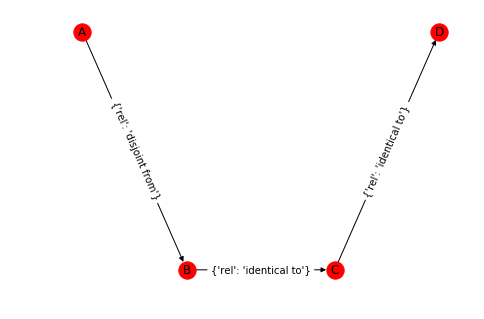

Since  A disjoint from B , and  B identical to C , this means
A disjoint from C
Since  B identical to C , and  C identical to D , this means
B identical to D
Since  C identical to B , and  B disjoint from A , this means
C disjoint from A
Since  D identical to C , and  C identical to B , this means
D identical to B
Since  A disjoint from C , and  C identical to D , this means
A disjoint from D
Since  D identical to C , and  C disjoint from A , this means
D disjoint from A
( A , B ) disjoint from
( A , C ) disjoint from
( A , D ) disjoint from
( B , A ) disjoint from
( B , C ) identical to
( B , D ) identical to
( C , B ) identical to
( C , D ) identical to
( C , A ) disjoint from
( D , C ) identical to
( D , B ) identical to
( D , A ) disjoint from
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


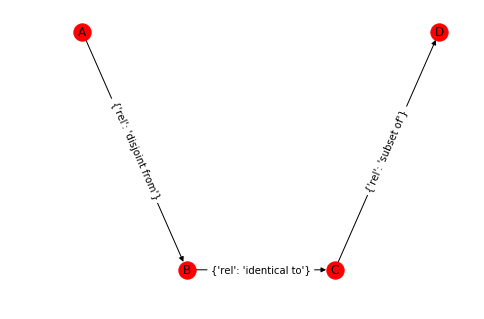

Since  A disjoint from B , and  B identical to C , this means
A disjoint from C
Since  B identical to C , and  C subset of D , this means
B subset of D
Since  C identical to B , and  B disjoint from A , this means
C disjoint from A
Since  D superset of C , and  C identical to B , this means
D superset of B
( A , B ) disjoint from
( A , C ) disjoint from
( B , A ) disjoint from
( B , C ) identical to
( B , D ) subset of
( C , B ) identical to
( C , D ) subset of
( C , A ) disjoint from
( D , C ) superset of
( D , B ) superset of
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


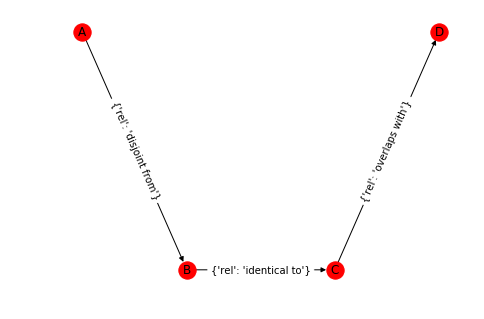

Since  A disjoint from B , and  B identical to C , this means
A disjoint from C
Since  B identical to C , and  C overlaps with D , this means
B overlaps with D
Since  C identical to B , and  B disjoint from A , this means
C disjoint from A
Since  D overlaps with C , and  C identical to B , this means
D overlaps with B
( A , B ) disjoint from
( A , C ) disjoint from
( B , A ) disjoint from
( B , C ) identical to
( B , D ) overlaps with
( C , B ) identical to
( C , D ) overlaps with
( C , A ) disjoint from
( D , C ) overlaps with
( D , B ) overlaps with
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


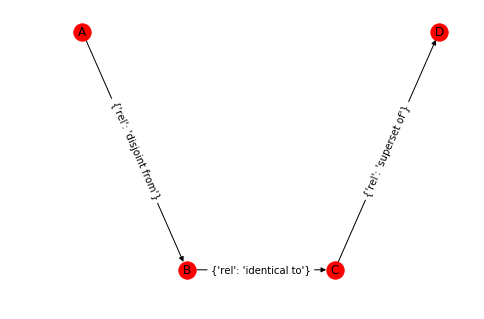

Since  A disjoint from B , and  B identical to C , this means
A disjoint from C
Since  B identical to C , and  C superset of D , this means
B superset of D
Since  C identical to B , and  B disjoint from A , this means
C disjoint from A
Since  D subset of C , and  C identical to B , this means
D subset of B
Since  A disjoint from C , and  C superset of D , this means
A disjoint from D
Since  D subset of C , and  C disjoint from A , this means
D disjoint from A
( A , B ) disjoint from
( A , C ) disjoint from
( A , D ) disjoint from
( B , A ) disjoint from
( B , C ) identical to
( B , D ) superset of
( C , B ) identical to
( C , D ) superset of
( C , A ) disjoint from
( D , C ) subset of
( D , B ) subset of
( D , A ) disjoint from
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


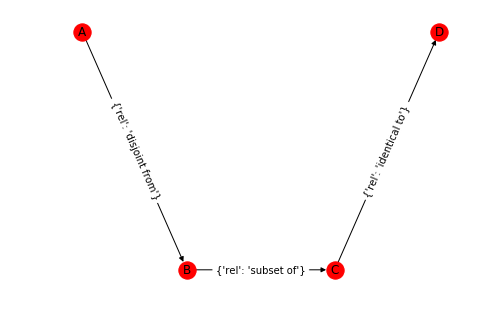

Since  B subset of C , and  C identical to D , this means
B subset of D
Since  D identical to C , and  C superset of B , this means
D superset of B
( A , B ) disjoint from
( B , A ) disjoint from
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) identical to
( D , C ) identical to
( D , B ) superset of
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


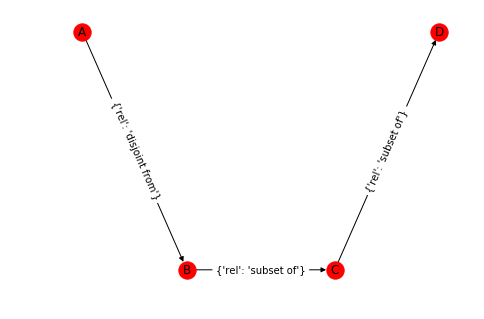

Since  B subset of C , and  C subset of D , this means
B subset of D
Since  D superset of C , and  C superset of B , this means
D superset of B
( A , B ) disjoint from
( B , A ) disjoint from
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) subset of
( D , C ) superset of
( D , B ) superset of
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


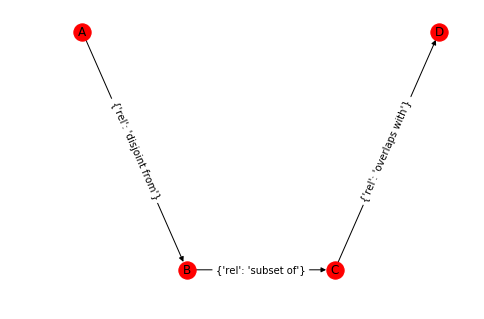

( A , B ) disjoint from
( B , A ) disjoint from
( B , C ) subset of
( C , B ) superset of
( C , D ) overlaps with
( D , C ) overlaps with
{'C', 'B', 'A'} {'D', 'C', 'B'} {'A', 'D', 'C', 'B'}
{'A'} {'D'}


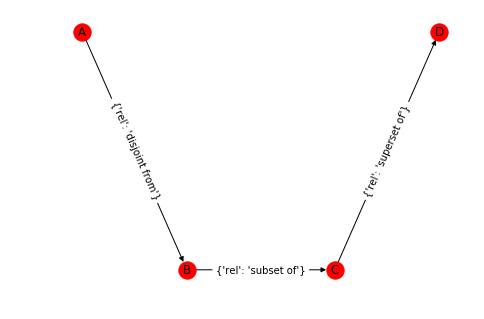

( A , B ) disjoint from
( B , A ) disjoint from
( B , C ) subset of
( C , B ) superset of
( C , D ) superset of
( D , C ) subset of


In [15]:
# Generic statements sets 
import itertools
#def powerset_generic_to_specific(generic_statement_set):
generic_statement_set = [['A','All','B'],['B','All','C'],['C','Some','D']]

# add one more step here for multiple generic statements between two nodes - compatible (All,Some), (Some, Some_not), (Some_not, no). incompatible (no,all), (all, some_not), (some, no)
# the incompatible types should be filtered out during entry



# set of converted generic to specific sets
possibilities_set = [list(generic_to_specific[statement[1]]) if statement[1] in generic_statement_options else [statement[1]] for statement in generic_statement_set]
node_set = [[statement[0],statement[2]] for statement in generic_statement_set]
print(possibilities_set,'\n\n\n')

def flattentup(tup):
    flatlist = []
    for elt in tup:
        #print(elt,type(elt))
        if type(elt) is not tuple:
            #print('elt appended')
            flatlist.append(elt)
        else:
            #print('calling recursive')
            flatlist = flatlist + flattentup(elt)
    return flatlist

#combinations = list(itertools.product([ps for ps in possibilities_set]))
#print(combinations)

combinations = possibilities_set[0]
for i in possibilities_set[1:len(possibilities_set)]:
    combinations = list(itertools.product(combinations,i))
#print(combinations)

combinationslist = [flattentup(elt) for elt in combinations]
print(combinationslist)

infgraphdict =dict()
for i in range(len(combinationslist)):
    infgraphdict[i] = []
    for j in range(len(node_set)):
        infgraphdict[i].append([node_set[j][0],combinationslist[i][j],node_set[j][1]])
print(infgraphdict)

import networkx as nx
import matplotlib.pyplot as plt

infdict = dict()
for i in infgraphdict.keys():

    statement_set = infgraphdict[i]
    # make a graph? 
    infG = nx.DiGraph()
    # get list of nodes from elt 0 and 2 from each statement
    setnodes = set()
    fromnodes = set()
    tonodes = set()
    for statement in statement_set:
        fromnodes.add(statement[0])
        tonodes.add(statement[2])
        infG.add_edge(statement[0],statement[2],rel = statement[1])
    setnodes = fromnodes.union(tonodes)
    print(fromnodes,tonodes, setnodes)
    roots = fromnodes-tonodes
    ends = tonodes - fromnodes
    print(roots,ends)
    pos = nx.spectral_layout(infG)
    nx.draw(infG, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(infG,'rel')
    nx.draw_networkx_edge_labels(infG, pos, labels = edge_labels)
    #plt.savefig('this.png')
    plt.show()
    
    (infdict[i],contradiction_found) = make_all_inferences_multi(infG)
    del(infG)

In [39]:
# get possible relationships for each edge

edge_poss_dict = dict()

for i in infdict.keys():
    #print(i)
    for edge in infdict[i].edges():
        #print(edge)
        if edge not in edge_poss_dict.keys():
            #print('adding new key')
            edge_poss_dict[edge] = list()
            #print(edge_poss_dict[edge])
            #print(type(edge_poss_dict[edge]))
        t = [edge[0],get_rel_multidigraph(infdict[i],edge[0],edge[1]),edge[1]]
        if t not in edge_poss_dict[edge]:
            edge_poss_dict[edge].append(t)
        #print(edge_poss_dict[edge])


print(edge_poss_dict)

# consider converting possibles to smaller generic statement for readability. 

{('A', 'B'): [['A', 'disjoint from', 'B']], ('A', 'C'): [['A', 'disjoint from', 'C']], ('A', 'D'): [['A', 'disjoint from', 'D']], ('B', 'A'): [['B', 'disjoint from', 'A']], ('B', 'C'): [['B', 'identical to', 'C'], ['B', 'subset of', 'C']], ('B', 'D'): [['B', 'identical to', 'D'], ['B', 'subset of', 'D'], ['B', 'overlaps with', 'D'], ['B', 'superset of', 'D']], ('C', 'B'): [['C', 'identical to', 'B'], ['C', 'superset of', 'B']], ('C', 'D'): [['C', 'identical to', 'D'], ['C', 'subset of', 'D'], ['C', 'overlaps with', 'D'], ['C', 'superset of', 'D']], ('C', 'A'): [['C', 'disjoint from', 'A']], ('D', 'C'): [['D', 'identical to', 'C'], ['D', 'superset of', 'C'], ['D', 'overlaps with', 'C'], ['D', 'subset of', 'C']], ('D', 'B'): [['D', 'identical to', 'B'], ['D', 'superset of', 'B'], ['D', 'overlaps with', 'B'], ['D', 'subset of', 'B']], ('D', 'A'): [['D', 'disjoint from', 'A']]}


In [27]:
infdict

{0: <networkx.classes.multidigraph.MultiDiGraph at 0x5f6fd4e0f0>,
 1: <networkx.classes.multidigraph.MultiDiGraph at 0x5f73061978>,
 2: <networkx.classes.multidigraph.MultiDiGraph at 0x5f730c9b00>,
 3: <networkx.classes.multidigraph.MultiDiGraph at 0x5f7312abe0>,
 4: <networkx.classes.multidigraph.MultiDiGraph at 0x5f730d1550>,
 5: <networkx.classes.multidigraph.MultiDiGraph at 0x5f730d13c8>,
 6: <networkx.classes.multidigraph.MultiDiGraph at 0x5f741c0f28>,
 7: <networkx.classes.multidigraph.MultiDiGraph at 0x5f7427aba8>}

In [24]:
del(edge_poss_dict)

In [3]:
print([(x,y) for x in range(3) for y in range(3) if x != y])

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]
